In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["GOOG", "IBM", "AAPL", "MSFT", "AMZN"]
data = yf.download(tickers, start='2019-01-01', end='2025-01-01')["Close"]
print(data.head)

/var/folders/c4/kq748kl11rbdh1zn5wq0t37c0000gn/T/ipykernel_38972/3516936266.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2019-01-01', end='2025-01-01')["Close"]
[*********************100%***********************]  5 of 5 completed

<bound method NDFrame.head of Ticker            AAPL        AMZN        GOOG         IBM        MSFT
Date                                                                  
2019-01-02   37.575207   76.956497   51.937080   81.641182   94.789665
2019-01-03   33.832432   75.014000   50.457710   80.011299   91.302551
2019-01-04   35.276726   78.769501   53.171635   83.136383   95.548988
2019-01-07   35.198196   81.475502   53.056423   83.724533   95.670830
2019-01-08   35.869186   82.829002   53.448238   84.915001   96.364502
...                ...         ...         ...         ...         ...
2024-12-24  257.286652  229.050003  196.932236  219.963989  436.929138
2024-12-26  258.103729  227.050003  196.463745  220.434464  435.715790
2024-12-27  254.685883  223.750000  193.413620  218.366287  428.177216
2024-12-30  251.307877  221.300003  192.067993  215.886398  422.508331
2024-12-31  249.534180  219.389999  189.825256  215.474731  419.196564

[1510 rows x 5 columns]>


These are my core data science and finance libraries:

yfinance — fetches historical stock prices directly from Yahoo Finance.

pandas — handles data in tables (DataFrames).

numpy — for math and matrix operations.

matplotlib — for visualization.

In [2]:
#cleaning
print(data.isnull().sum())
data = data.dropna()

Ticker
AAPL    0
AMZN    0
GOOG    0
IBM     0
MSFT    0
dtype: int64


The first line checks for missing values (NaN) in the downloaded dataset using data.isnull().sum(). This provides a column-wise count of missing observations for each ticker, helping us confirm data integrity.

If any ticker contains missing values, we remove those rows using data.dropna(). This step guarantees that all assets share the same trading dates, which is critical for accurate return and covariance computations.

By cleaning the dataset at this stage, we:

-Eliminate potential misalignment between asset price series.

-Prevent runtime errors in later calculations.

-Ensure our portfolio metrics (returns, volatility, drawdowns) are based on a uniform and reliable data sample.

My takeaways:
Data cleaning ensures that subsequent quantitative analyses reflect true market movements rather than artifacts from missing or inconsistent data.

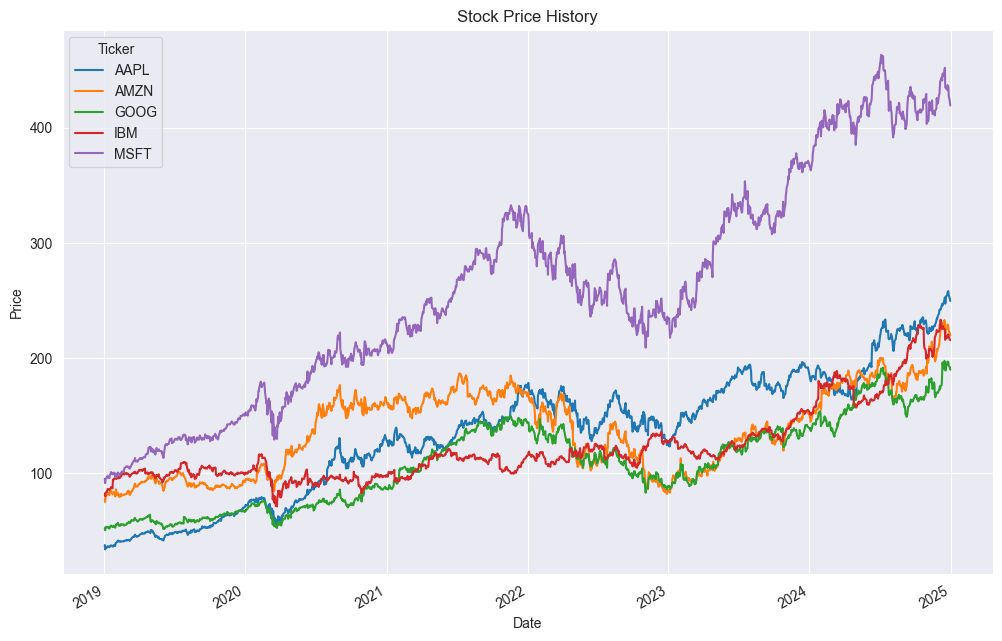

In [3]:
data.plot(figsize=(12, 8))
plt.title("Stock Price History")
plt.ylabel("Price")
plt.xlabel("Date")

data.index = pd.to_datetime(data.index)

Analysis:
This code generates a time series plot showing the daily closing prices of each stock over the selected date range.
Each line represents one ticker, allowing for easy visual comparison of their long-term price movements and relative volatility.

-data.plot(figsize=(12, 8)) — plots all stock prices on a single chart for side-by-side visualization.

-plt.title(), plt.ylabel(), and plt.xlabel() — label the chart for readability.

-data.index = pd.to_datetime(data.index) — ensures that the DataFrame’s index is properly formatted as datetime objects, which is essential for accurate time-based plotting and analysis.

This visualization helps identify general market trends, growth trajectories, and volatility patterns.
For instance, a stock with a steeper upward slope indicates stronger price appreciation, while frequent sharp movements suggest higher volatility.

My takeaway:
Plotting price history provides a foundational understanding of each asset’s behavior over time and sets the stage for deeper statistical analysis like returns and risk metrics.

Ticker          AAPL      AMZN      GOOG       IBM      MSFT
Date                                                        
2019-01-03 -0.099608 -0.025241 -0.028484 -0.019964 -0.036788
2019-01-04  0.042690  0.050064  0.053786  0.039058  0.046510
2019-01-07 -0.002226  0.034353 -0.002167  0.007075  0.001275
2019-01-08  0.019063  0.016612  0.007385  0.014219  0.007251
2019-01-09  0.016982  0.001714 -0.001505  0.007177  0.014300


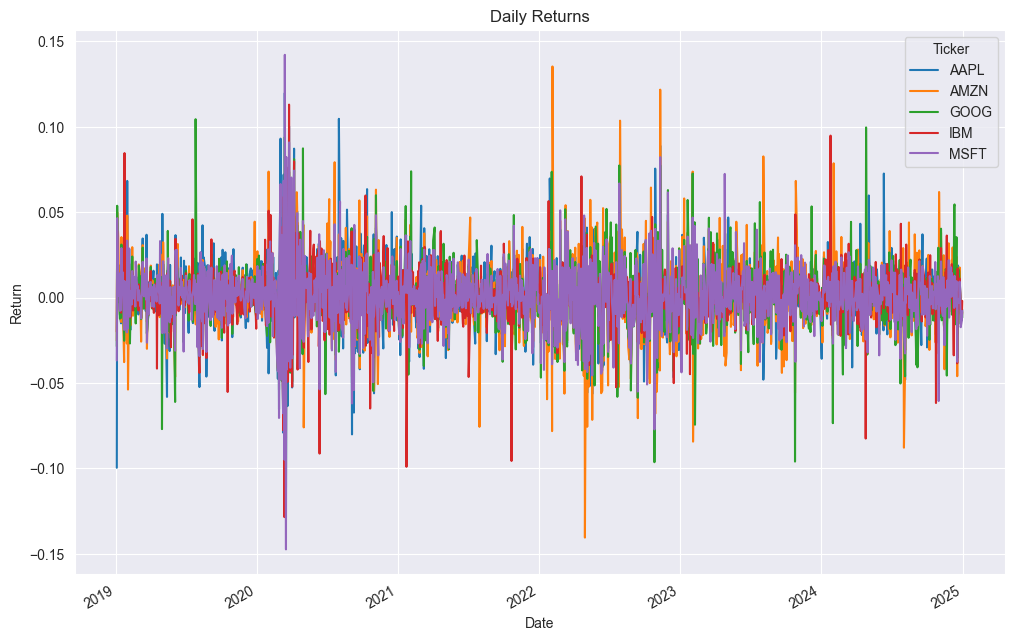

In [4]:
#daily returns
returns = data.pct_change().dropna()
print(returns.head())

returns.plot(figsize=(12, 8))
plt.title("Daily Returns")
plt.ylabel("Return")
plt.xlabel("Date")
plt.show()

Analysis:

-data.pct_change() computes the percentage change between consecutive days for each stock, effectively capturing daily performance.

-.dropna() removes the first row (which has no previous day to compare against).

-The resulting returns DataFrame contains each asset’s day-to-day rate of change.

The plot shows each stock’s daily returns as a time series.
These values typically fluctuate around zero — positive values indicate gains, and negative values indicate losses.

Daily returns are a fundamental building block in quantitative finance because they allow us to measure:

-Short-term volatility and variability in prices.

-Correlations between assets.

-Portfolio performance metrics (like risk and Sharpe ratios).

A visual inspection of daily returns reveals how volatile each asset is:

-Stocks with larger spikes (up or down) have higher short-term risk.

-More stable lines indicate lower volatility and smoother performance.

My takeaway:
Daily returns transform raw price data into a standardized measure of performance that can be compared across assets and used for further analysis like volatility, cumulative returns, and drawdowns.

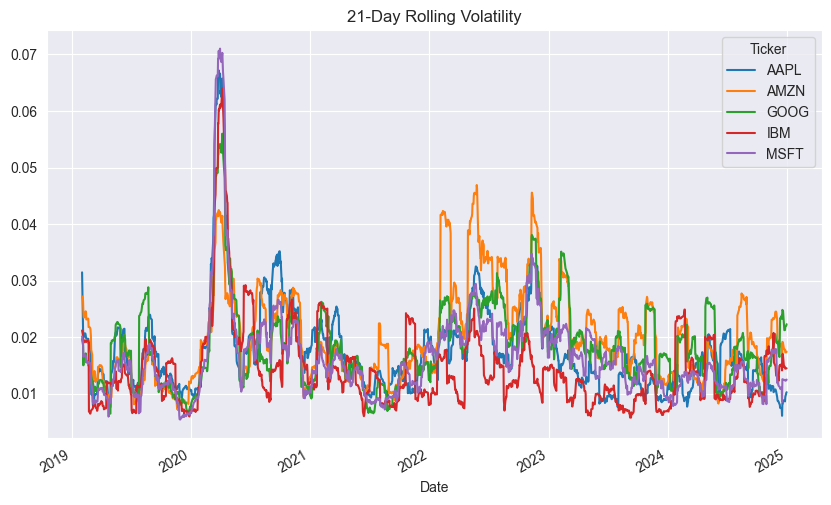

In [5]:
#rolling volatility
rolling_vol = returns.rolling(window=21).std()
rolling_vol.plot(figsize=(10, 6))
plt.title("21-Day Rolling Volatility")
plt.show()

Analysis:

-returns.rolling(window=21) applies a 21-day moving window (roughly one trading month).

-.std() computes the standard deviation of returns within each window, representing volatility.

-Plotting the result shows how each stock’s volatility evolves through time.

This graph helps visualize periods of high and low market turbulence:

-Spikes in volatility often occur during major market events, earnings announcements, or economic shocks.

-Lower volatility indicates stability or less market uncertainty.

By comparing volatility lines across assets:

-You can identify which stocks consistently exhibit higher risk.

-It becomes easier to spot diversification opportunities — pairing assets with uncorrelated or offsetting volatility patterns.

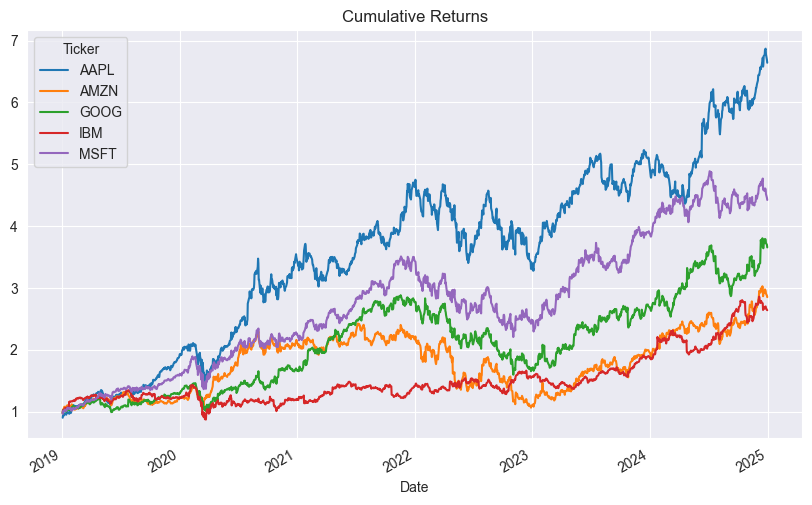

In [6]:
#cumulative returns
cum_returns = (1 + returns).cumprod()
cum_returns.plot(figsize=(10, 6))
plt.title("Cumulative Returns")
plt.show()

Analysis:

-(1 + returns) converts daily percentage changes into growth factors (e.g., a 1% gain becomes 1.01).

-.cumprod() (cumulative product) multiplies these factors over time, compounding gains and losses.

-The resulting cum_returns DataFrame represents how $1 invested at the start of the time period would have evolved for each stock.

This chart provides a clear visualization of each asset’s total performance trajectory:

-A steadily upward-sloping line represents consistent growth.

-Flat or declining periods reflect stagnation or drawdowns.

-Comparing the slopes of different lines helps identify which stocks outperform or underperform over the long term.

My Takeaways:
Cumulative returns summarize how each stock’s price movements translate into actual compounded growth.
They offer a long-term view of investment performance and form the basis for comparing total returns across assets or portfolios.

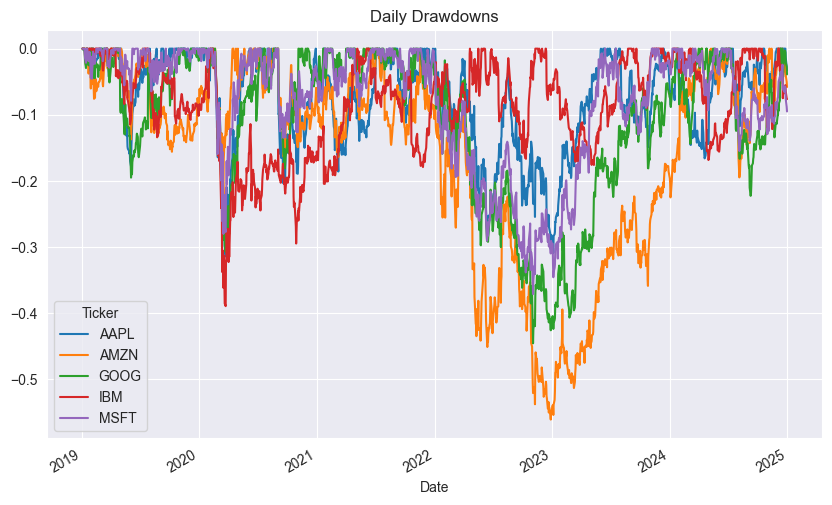

In [7]:
#Drawdown
rolling_max = cum_returns.cummax()
drawdowns = (cum_returns - rolling_max) / rolling_max

drawdowns.plot(figsize=(10, 6))
plt.title("Daily Drawdowns")
plt.show()

Analysis:

-cum_returns.cummax() computes the rolling maximum of cumulative returns — the highest value reached up to each point in time.

-(cum_returns - rolling_max) / rolling_max calculates how far the current value has fallen from that peak, expressed as a percentage.

-The result (drawdowns) captures periods of losses relative to previous highs.

When plotted, the chart displays drawdowns as negative values, where deeper troughs represent larger declines.
For instance, a value of -0.2 corresponds to a 20% drop from the prior peak.

-Sharp or prolonged drawdowns indicate high downside risk.

-Frequent shallow drawdowns suggest more stable performance.

-Comparing drawdown patterns between assets helps identify which ones recover faster or experience less severe losses during market stress.

My takeaways:
Drawdowns quantify the pain of losses — not just volatility.
While returns and volatility describe how much prices move, drawdowns show how badly things can go before they get better, making them a critical risk metric for any investment strategy